<a href="https://colab.research.google.com/github/chrisekwugum/Business_Dashboard/blob/master/Forcasting_xyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#create a dataframe with both columns and index label using dictionary
xyz = pd.DataFrame({'Q1': [50, 52, 54,55], 'Q2': [55, 57, 60, 62], 'Q3': [60,62,63,65], 'Q4':[65,70,75,80]}, index=['2020', '2021', '2022','2023'])

In [ ]:
xyz.head()

,Q1,Q2,Q3,Q4
2020,50,55,60,65
2021,52,57,62,70
2022,54,60,63,75
2023,55,62,65,80


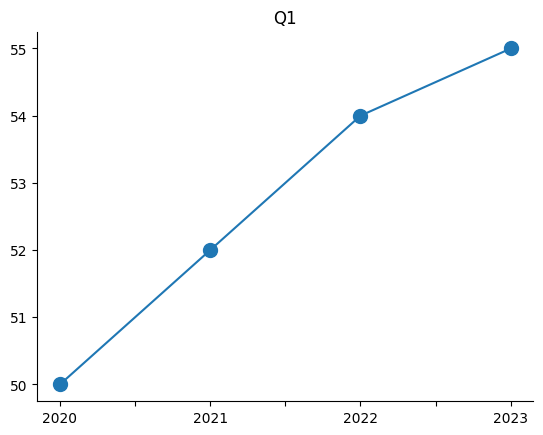

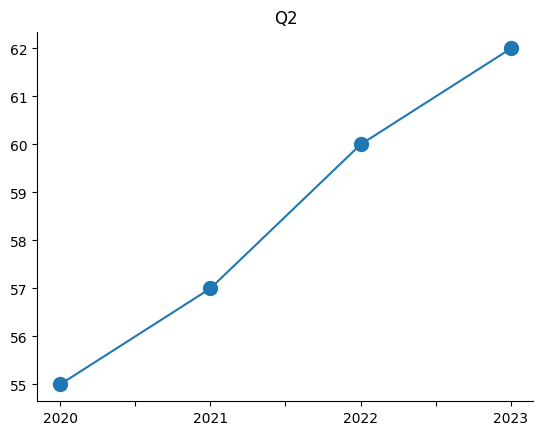

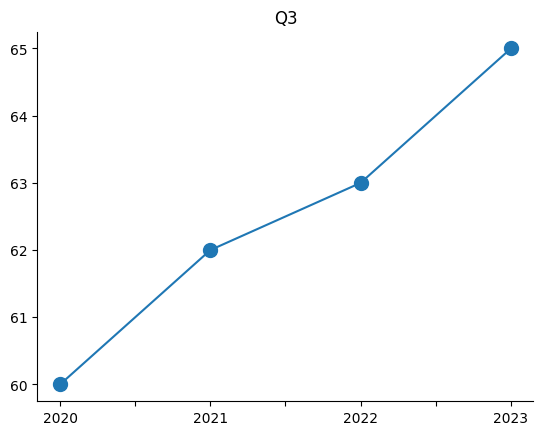

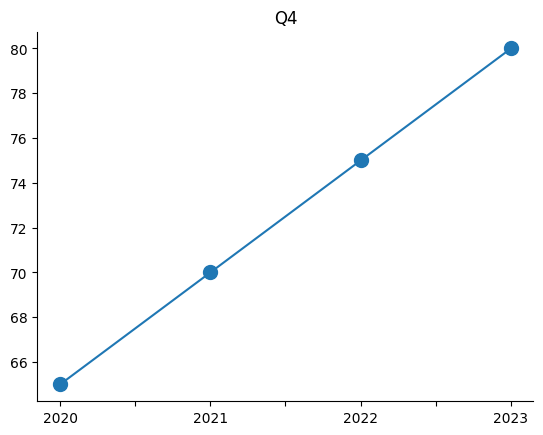

In [ ]:
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    xyz[quarter].plot(kind='line', marker='o', markersize=10, title=quarter)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

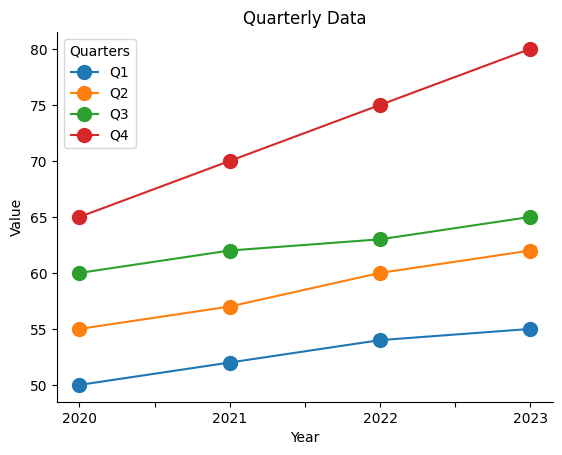

In [ ]:

# Plotting all the quarters
xyz.plot(kind='line', marker='o', markersize=10, title='Quarterly Data')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Value")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend(title='Quarters')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


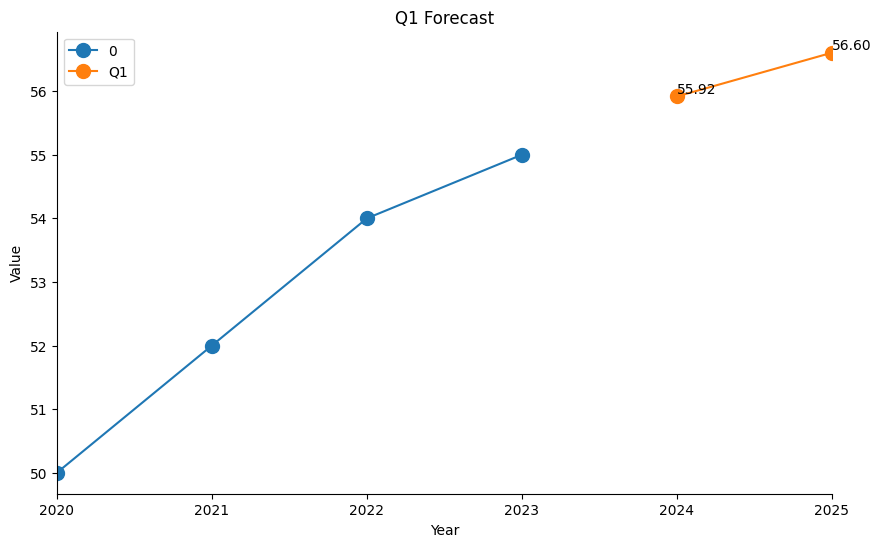

In [ ]:
# Prepare data for forecasting
xyz = xyz.reset_index()
xyz['index'] = pd.to_datetime(xyz['index'])
xyz = xyz.set_index('index')
data = xyz['Q1']

# Create and fit the model
model = AutoReg(data, lags=1)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(data), end=len(data) + 1)

# Create future dates
future_dates = pd.to_datetime(['2024', '2025'])

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Q1': predictions}, index=future_dates)

# Concatenate original data with predictions
combined_df = pd.concat([data, predictions_df])

# Plot the combined data
fig, ax = plt.subplots(figsize=(10, 6))
combined_df.plot(kind='line', marker='o', markersize=10, title='Q1 Forecast', ax=ax)

# Add predicted values as text
for i, val in enumerate(predictions):
    ax.text(future_dates[i], val, f'{val:.2f}', ha='left', va='bottom')

plt.xlabel("Year")
plt.ylabel("Value")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


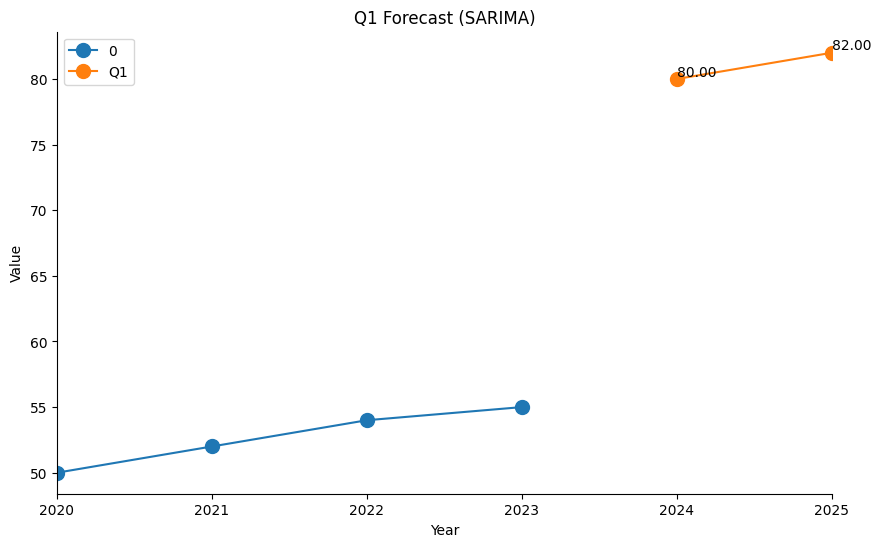

In [ ]:
# Convert index to datetime
xyz.index = pd.to_datetime(xyz.index)

# Consider Q1 data for demonstration
data = xyz['Q1']

# Fit SARIMA model (example parameters - you'll need to determine the best ones)
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit()

# Make predictions (adjust end for desired forecast horizon)
predictions = model_fit.predict(start=len(data), end=len(data) + 1)

# Create future dates
future_dates = pd.to_datetime(['2024', '2025'])

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Q1': predictions}, index=future_dates)

# Concatenate original data with predictions
combined_df = pd.concat([data, predictions_df])

# Plotting the combined data
fig, ax = plt.subplots(figsize=(10, 6))
combined_df.plot(kind='line', marker='o', markersize=10, title='Q1 Forecast (SARIMA)', ax=ax)

# Add predicted values as text
for i, val in enumerate(predictions):
    ax.text(future_dates[i], val, f'{val:.2f}', ha='left', va='bottom')

plt.xlabel("Year")
plt.ylabel("Value")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

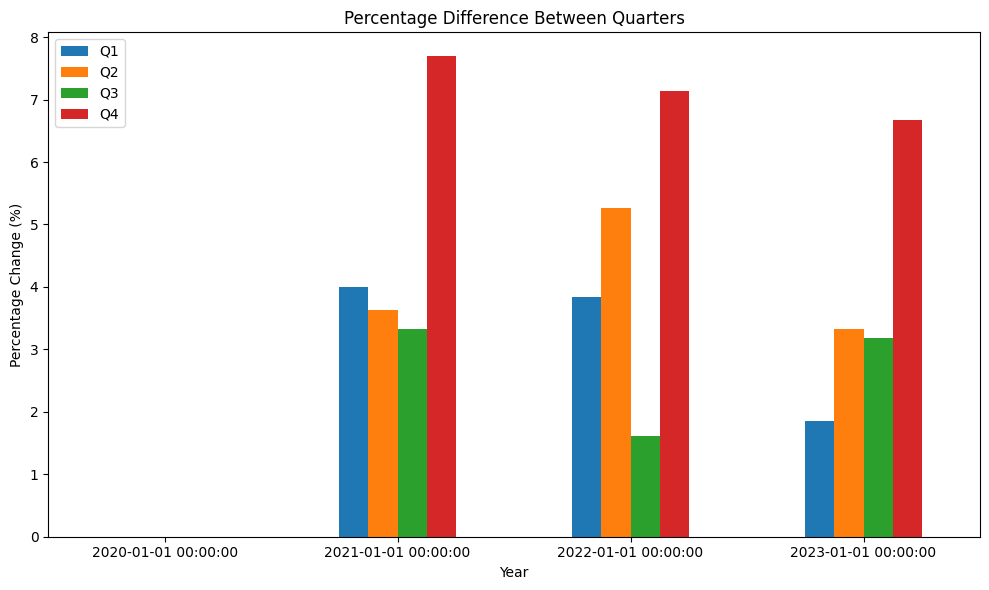

In [ ]:
# Calculate percentage difference for each quarter
percentage_diff = xyz.pct_change() * 100

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

percentage_diff.plot(kind='bar', ax=ax)

plt.title('Percentage Difference Between Quarters')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


## Analysis and Inferences from the dataset

**Trends:**

* **Overall Growth:** Sales have generally increased over the years, with a more significant growth rate in 2023.
* **Seasonal Patterns:** There seems to be a slight seasonal pattern, with higher sales in Q3 and Q4 compared to Q1 and Q2.
* **Year-over-Year Growth:** Sales have increased year-over-year, with the most significant growth in 2023.

**Inferences:**

* **New Product Launch Impact:**  The increase in sales starting from Q2 2020 could be attributed to the successful launch of the new product line (assuming this happened in Q2 2020 based on the context provided).
* **Supply Chain Disruptions:** The dip in sales in Q4 2021 might be a result of the supply chain disruptions.
* **Market Expansion Impact:** The continued growth in sales, particularly in 2023, could be influenced by the expansion into new international markets (assuming this happened in or before 2023).
* **Marketing Campaign Impact:** The significant increase in sales in Q3 2023 might be partially due to the increased marketing efforts (assuming this happened in Q3 2023).

**Predictions:**

* Based on the current trends and the positive impact of new product launches and market expansion, it is reasonable to predict continued growth in sales for XYZ Corporation in the coming years.
* The seasonal pattern observed might continue, with higher sales in Q3 and Q4.
* The company's ability to navigate future supply chain challenges and maintain its marketing efforts will be crucial for sustained growth.
